<h1 style="text-align: center;">Credit Card Fraud Detector</h1>

---

# Introdução

## Propósito

Este projeto tem como propósito o meu aprendizado sobre comportamentos fraudulentos e a demonstração das minhas habilidades com treinamento de modelos de classificação utilizando aprendizagem de máquina supervisionado até o momento. 

### Objetivo

Aprender sobre comportamentos fraudulentos e criar um modelo de aprendizagem de máquina capaz de classificar corretamente transações de cartões de crédito fraudulentas.

### Como?

Para isso irei utilizar um conjunto de dados proveniente da plataforma Kaggle.

Os dados estão disponíveis para download através deste link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?datasetId=310&sortBy=voteCount



## Entendendo os dados

Este conjunto de dados contém transações de cartões de crédito feitas por Europeus em setembro de 2013 durante dois dias. Cada linha representa uma transação e cada coluna uma iformação sobre a transação.

O dataset contém 31 colunas e todas são numéricas. Sabemos o significado de apenas 3: "Time", "Amount" e "Class".
- Time: tempo (em segundos) que se passaram entre cada transação e a primeira transação do conjunto de dados
- Amount: valor da transação
- Class: variável binária que identifica transações como fraudulentas (1) e não-fraudulentas (0)

As outras 28 features ("V1", "V2"... "V28") sofreram transformação PCA e tiveram seus nomes ocultados por questões de privacidade. Ou seja, a única coisa que sabemos sobre elas é que já foram escaladas.

## Etapas do projeto

Para atingir estes objetivos planejo seguir as seguintes etapas:

- Contextualização do problema
- Importação dos dados
- Limpeza dos dados e pré-processamento
- Análise exploratória dos dados
- Modelagem dos dados
- Treinar algoritmos Classificadores de aprendizagem de máquina
- Avaliar a performance dos algoritmos
- Utilizar técnicas para conseguir a melhor performance possível

# Contextualização do problema

Tipicamente uma organização perde 5% da sua receita por fraude a cada ano. Na verdade, estimasse que fraude custe para o Reino Unido 73 bilhões de libras esterlinas.

Comportamentos fraudulentos podem ser encontrados em diversas áreas. A fraude de cartão de crédito provavelmente é o exemplo mais conhecido, mas também encontramos fraude na área de seguros, lavagem de dinheiro, evasão fiscal etc.

## Alguns fatores dificultam a detecção de fraude:

- Casos de fraude são minoria: geralmente menos de 1% das transações de uma empresa são fauduletas
- Fraudadores tentam ao máximo "se misturar" e esconder as suas atividades
- Fraudadores mudam seus métodos e comportamentos com o tempo
- Fraudadores geralmente trabalham em conjunto de forma organizada, dificultando a detecção de fraude

## Como as empresas lidam com fraude?

Geralmente as empresas possuem um time de analistas de fraude. Esse time tenta detectar as fraudes através de alguns métodos:
- Definir regras e limiares para filtrar casos estranhos
- Ficam atentos à notícias para nomes suspeitos
- Utilizam listas de ocorrências externas da polícia e contrastam com a base de clientes
- Utilizam algorítimos de aprendizado de máquina para detectar fraude e/ou comportamentos suspeitos:
    - Os métodos anteriores podem ser úteis para treinar um modelo de aprendizado de máquina (podemos utilizá-los como "input" para a nossa análise). Porém, devemos ter em mente que os rótulos provenientes de sistemas baseados em regras podem não detectar todos os casos fraudulentos. Ou seja, devemos sempre nos perguntar se estes rótulos são confiáveis ou não.

# Instalando e importando bibliotecas que serão utilizadas

In [11]:
# Célula com o código para instalar as versões utilizadas nesse projeto, depois que eu concluir


In [15]:
# Importando bibliotecas úteis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importação dos dados

In [38]:
# Guardando o conjunto de dados em um objeto DataFrame do pandas, sob o acrônimo ccf_df (credit card fraud data frame)
ccf_df = pd.read_csv('datasets/creditcard.csv')

# Exploração inicial dos dados

In [19]:
# Mostrando as primeiras 5 transações da tabela
ccf_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
# Mostrando a quantidade de linhas e colunas
ccf_df.shape

(284807, 31)

In [21]:
# Explorando as features disponíveis no conjunto de dados
ccf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Ótimo! não existem valores nulos. Todas as colunas são numéricas a parecem estar no tipo certo.

In [39]:
# Contando o número de ocorrências de transações fraudulentas e não fraudulentas e guardando no acrônimo occ (occurrence)
occ = ccf_df['Class'].value_counts()
display(occ)

0    284315
1       492
Name: Class, dtype: int64

Como esperado para estes casos, existe uma ocorrência muito maior de transações legítimas do que de transações fraudulentas.

Isso pode ser um problema ao treinarmos nosso modelo de aprendizagem de máquina. Geralmente estes modelos funcionam melhor quando existe um número semelhante de ocorrências em cada classe. Se existem poucos casos de fraude, então existe poucos dados para ensinar o modelo a identificar fraude.

Isso é chamado de "class imbalance" e é um dos principais desafios na detecção de fraude.

Por curiosidade, vamos ver a proporção de indivíduos em cada classe:

In [24]:
# Calculando a proporção de indivíduos em cada classe
occ / len(ccf_df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Transações legítimas representam 99,87% das transações, enquanto transações fraudulentas representam apenas 0,17%

In [33]:
# Definindo função que irá separar as "features" (X) dos "labels" (y)
def prep_data(df):
    X = df.iloc[:, 0:30]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 30]
    y=np.array(y).astype(np.float)
    return X,y

# Definindo função que irá criar um "scatter plot" dos dados e seus rótulos
def plot_data(X, y):
	plt.scatter(X[y == 0, 0], X[y == 0, 1], 
                label="Class #0", 
                alpha=0.5, 
                linewidth=0.15)
	plt.scatter(X[y == 1, 0], X[y == 1, 1], 
                label="Class #1", 
                alpha=0.5, 
                linewidth=0.15, c='r')
	plt.legend()
	return plt.show()

C:\Users\marco\AppData\Local\Temp\ipykernel_18632\2681907953.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(X).astype(np.float)
C:\Users\marco\AppData\Local\Temp\ipykernel_18632\2681907953.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=np.array(y).astype(np.float)


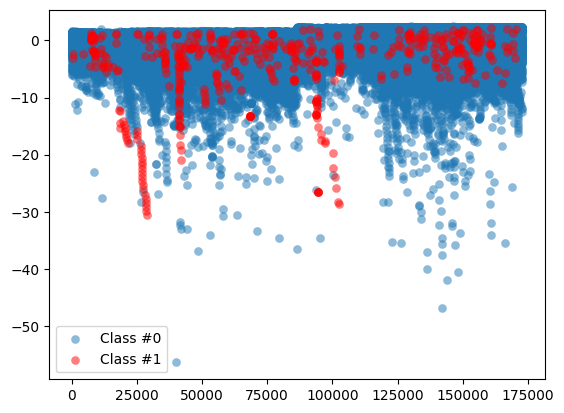

In [35]:
# Visualizando a distribuição dos dados através de um scatter plot
X, y = prep_data(ccf_df)
plot_data(X, y)